In [1]:
from simple_dqn_tf2 import Agent
import matplotlib.pyplot as plt
import numpy as np
import gym
from utils import plotLearning
import tensorflow as tf

In [2]:
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

C:\Apps\Machine_Learning\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def plotResult(x, scores, epsilons, filename, lines=None):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

    plt.savefig(filename, bbox_inches='tight',dpi=1080)

In [4]:


if __name__ == '__main__':
    tf.compat.v1.disable_eager_execution()
    env = gym.make('LunarLander-v2')
    lr = 0.0005
    n_games = 300
    epsilon_dec = 8e-4
    epsilon_end = 0.01
    mem_size = 200000
    agent = Agent(gamma=0.99, epsilon=1, lr=lr, epsilon_dec=epsilon_dec,
                input_dims=env.observation_space.shape,
                n_actions=env.action_space.n, mem_size=mem_size, batch_size=100,
                epsilon_end=epsilon_end)
    scores = []
    pre_avg_score = -999
    eps_history = []

    for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, observation_, done)
            observation = observation_
            agent.learn()
        eps_history.append(agent.epsilon)
        scores.append(score)

        avg_score = np.mean(scores[-50:])
        print('episode: ', i, 'score %.2f' % score,
                'average_score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)


episode:  0 score -249.00 average_score -249.00 epsilon 1.00


C:\Apps\Machine_Learning\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode:  1 score -117.26 average_score -183.13 epsilon 0.94
episode:  2 score -329.28 average_score -231.85 epsilon 0.86
episode:  3 score -124.79 average_score -205.08 epsilon 0.80
episode:  4 score -160.16 average_score -196.10 epsilon 0.72
episode:  5 score -91.58 average_score -178.68 epsilon 0.66
episode:  6 score -36.76 average_score -158.40 epsilon 0.59
episode:  7 score -91.35 average_score -150.02 epsilon 0.51
episode:  8 score -154.00 average_score -150.46 epsilon 0.43
episode:  9 score -83.62 average_score -143.78 epsilon 0.01
episode:  10 score -157.20 average_score -145.00 epsilon 0.01
episode:  11 score 235.90 average_score -113.26 epsilon 0.01
episode:  12 score -234.18 average_score -122.56 epsilon 0.01
episode:  13 score -37.58 average_score -116.49 epsilon 0.01
episode:  14 score -34.26 average_score -111.01 epsilon 0.01
episode:  15 score -319.35 average_score -124.03 epsilon 0.01
episode:  16 score 124.81 average_score -109.39 epsilon 0.01
episode:  17 score -20.62

episode:  138 score 147.24 average_score 198.51 epsilon 0.01
episode:  139 score 108.97 average_score 197.24 epsilon 0.01
episode:  140 score 299.88 average_score 198.46 epsilon 0.01
episode:  141 score 280.76 average_score 203.88 epsilon 0.01
episode:  142 score 273.99 average_score 203.96 epsilon 0.01
episode:  143 score 231.18 average_score 203.51 epsilon 0.01
episode:  144 score 258.57 average_score 209.93 epsilon 0.01
episode:  145 score 282.41 average_score 209.98 epsilon 0.01
episode:  146 score 135.22 average_score 207.30 epsilon 0.01
episode:  147 score 131.01 average_score 204.73 epsilon 0.01
episode:  148 score 239.40 average_score 204.34 epsilon 0.01
episode:  149 score 264.33 average_score 209.40 epsilon 0.01
episode:  150 score 48.23 average_score 205.50 epsilon 0.01
episode:  151 score 141.58 average_score 203.76 epsilon 0.01
episode:  152 score 265.25 average_score 204.21 epsilon 0.01
episode:  153 score 268.38 average_score 204.54 epsilon 0.01
episode:  154 score -9.67

episode:  273 score 281.12 average_score 215.89 epsilon 0.01
episode:  274 score -2.03 average_score 210.24 epsilon 0.01
episode:  275 score 243.08 average_score 209.92 epsilon 0.01
episode:  276 score 26.85 average_score 205.13 epsilon 0.01
episode:  277 score 264.41 average_score 205.21 epsilon 0.01
episode:  278 score 241.36 average_score 205.73 epsilon 0.01
episode:  279 score 204.27 average_score 204.71 epsilon 0.01
episode:  280 score 225.10 average_score 204.06 epsilon 0.01
episode:  281 score 261.14 average_score 203.86 epsilon 0.01
episode:  282 score 206.42 average_score 202.69 epsilon 0.01
episode:  283 score 238.04 average_score 201.96 epsilon 0.01
episode:  284 score 273.99 average_score 202.67 epsilon 0.01
episode:  285 score 276.20 average_score 207.39 epsilon 0.01
episode:  286 score 131.60 average_score 205.38 epsilon 0.01
episode:  287 score 303.79 average_score 206.11 epsilon 0.01
episode:  288 score 266.13 average_score 211.01 epsilon 0.01
episode:  289 score 248.56

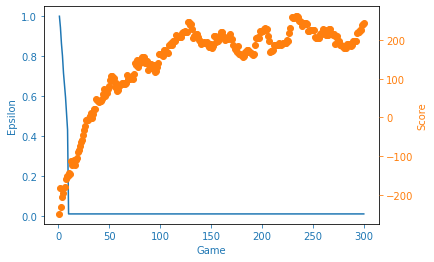

In [5]:
filename = 'lunarlander_part1.png'
x = [i+1 for i in range(len(eps_history))]
plotResult(x, scores, eps_history, filename)

In [6]:
for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, observation_, done)
            observation = observation_
            agent.learn()
        eps_history.append(agent.epsilon)
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode: ', i, 'score %.2f' % score,
                'average_score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)

episode:  0 score 129.43 average_score 213.71 epsilon 0.01
episode:  1 score 273.19 average_score 213.79 epsilon 0.01
episode:  2 score 290.38 average_score 213.94 epsilon 0.01
episode:  3 score 258.69 average_score 215.15 epsilon 0.01
episode:  4 score 219.00 average_score 214.54 epsilon 0.01
episode:  5 score 222.42 average_score 218.14 epsilon 0.01
episode:  6 score 291.95 average_score 221.10 epsilon 0.01
episode:  7 score 265.13 average_score 227.51 epsilon 0.01
episode:  8 score 241.08 average_score 227.00 epsilon 0.01
episode:  9 score 257.00 average_score 227.14 epsilon 0.01
episode:  10 score 273.69 average_score 227.51 epsilon 0.01
episode:  11 score 271.48 average_score 228.09 epsilon 0.01
episode:  12 score 211.04 average_score 227.47 epsilon 0.01
episode:  13 score 264.31 average_score 227.51 epsilon 0.01
episode:  14 score 220.40 average_score 227.01 epsilon 0.01
episode:  15 score 245.42 average_score 226.86 epsilon 0.01
episode:  16 score 279.04 average_score 226.75 eps

episode:  137 score 275.06 average_score 212.22 epsilon 0.01
episode:  138 score 0.75 average_score 209.45 epsilon 0.01
episode:  139 score 280.77 average_score 213.04 epsilon 0.01
episode:  140 score 272.33 average_score 215.85 epsilon 0.01
episode:  141 score 241.21 average_score 216.47 epsilon 0.01
episode:  142 score 268.27 average_score 219.00 epsilon 0.01
episode:  143 score 281.79 average_score 219.20 epsilon 0.01
episode:  144 score 252.73 average_score 222.97 epsilon 0.01
episode:  145 score 283.54 average_score 223.11 epsilon 0.01
episode:  146 score 247.09 average_score 222.81 epsilon 0.01
episode:  147 score 203.58 average_score 222.90 epsilon 0.01
episode:  148 score 242.38 average_score 222.51 epsilon 0.01
episode:  149 score 261.70 average_score 222.38 epsilon 0.01
episode:  150 score 275.94 average_score 222.46 epsilon 0.01
episode:  151 score 288.24 average_score 222.77 epsilon 0.01
episode:  152 score 6.39 average_score 220.38 epsilon 0.01
episode:  153 score 270.56 a

episode:  272 score 288.17 average_score 216.44 epsilon 0.01
episode:  273 score 264.27 average_score 216.61 epsilon 0.01
episode:  274 score 231.06 average_score 216.18 epsilon 0.01
episode:  275 score -289.74 average_score 210.81 epsilon 0.01
episode:  276 score 215.31 average_score 213.14 epsilon 0.01
episode:  277 score 268.14 average_score 213.00 epsilon 0.01
episode:  278 score -32.41 average_score 210.16 epsilon 0.01
episode:  279 score 285.63 average_score 210.20 epsilon 0.01
episode:  280 score 247.11 average_score 210.16 epsilon 0.01
episode:  281 score 302.78 average_score 210.57 epsilon 0.01
episode:  282 score 268.47 average_score 210.72 epsilon 0.01
episode:  283 score 27.20 average_score 208.11 epsilon 0.01
episode:  284 score 265.24 average_score 207.83 epsilon 0.01
episode:  285 score 13.90 average_score 205.16 epsilon 0.01
episode:  286 score 158.02 average_score 204.16 epsilon 0.01
episode:  287 score 30.48 average_score 201.68 epsilon 0.01
episode:  288 score 289.61

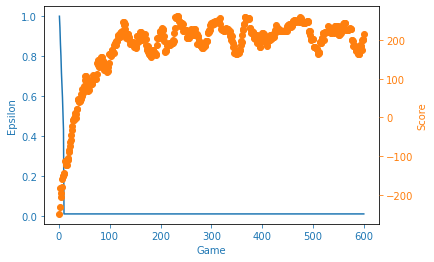

In [7]:
filename = 'lunarlander_part2.png'
x = [i+1 for i in range(len(eps_history))]
plotResult(x, scores, eps_history, filename)

In [8]:
for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, observation_, done)
            observation = observation_
            agent.learn()
        eps_history.append(agent.epsilon)
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode: ', i, 'score %.2f' % score,
                'average_score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)

episode:  0 score 36.66 average_score 210.43 epsilon 0.01
episode:  1 score 259.16 average_score 214.76 epsilon 0.01
episode:  2 score 23.08 average_score 212.56 epsilon 0.01
episode:  3 score -408.84 average_score 205.90 epsilon 0.01
episode:  4 score -181.29 average_score 201.39 epsilon 0.01
episode:  5 score 250.76 average_score 201.30 epsilon 0.01
episode:  6 score 227.52 average_score 201.01 epsilon 0.01
episode:  7 score -241.32 average_score 196.38 epsilon 0.01
episode:  8 score 280.01 average_score 199.06 epsilon 0.01
episode:  9 score 245.34 average_score 198.36 epsilon 0.01
episode:  10 score 285.10 average_score 198.95 epsilon 0.01
episode:  11 score 268.57 average_score 198.91 epsilon 0.01
episode:  12 score 281.90 average_score 199.04 epsilon 0.01
episode:  13 score 279.46 average_score 199.35 epsilon 0.01
episode:  14 score 210.30 average_score 198.65 epsilon 0.01
episode:  15 score 268.74 average_score 201.25 epsilon 0.01
episode:  16 score 268.96 average_score 201.25 ep

episode:  137 score 274.66 average_score 240.51 epsilon 0.01
episode:  138 score 282.62 average_score 240.40 epsilon 0.01
episode:  139 score 301.11 average_score 240.75 epsilon 0.01
episode:  140 score 261.99 average_score 240.70 epsilon 0.01
episode:  141 score 241.78 average_score 240.74 epsilon 0.01
episode:  142 score 302.81 average_score 241.28 epsilon 0.01
episode:  143 score 235.65 average_score 240.61 epsilon 0.01
episode:  144 score 260.21 average_score 240.59 epsilon 0.01
episode:  145 score 207.60 average_score 239.76 epsilon 0.01
episode:  146 score 299.77 average_score 239.87 epsilon 0.01
episode:  147 score 279.34 average_score 239.88 epsilon 0.01
episode:  148 score 310.81 average_score 240.27 epsilon 0.01
episode:  149 score 240.88 average_score 240.00 epsilon 0.01
episode:  150 score 249.50 average_score 239.67 epsilon 0.01
episode:  151 score 222.94 average_score 238.98 epsilon 0.01
episode:  152 score -44.76 average_score 238.26 epsilon 0.01
episode:  153 score 279.

episode:  272 score 284.54 average_score 251.26 epsilon 0.01
episode:  273 score 262.76 average_score 251.51 epsilon 0.01
episode:  274 score 218.38 average_score 251.12 epsilon 0.01
episode:  275 score 262.59 average_score 251.02 epsilon 0.01
episode:  276 score 209.11 average_score 250.27 epsilon 0.01
episode:  277 score 244.02 average_score 249.44 epsilon 0.01
episode:  278 score 283.47 average_score 249.16 epsilon 0.01
episode:  279 score 218.26 average_score 248.30 epsilon 0.01
episode:  280 score 266.72 average_score 248.26 epsilon 0.01
episode:  281 score 292.14 average_score 248.44 epsilon 0.01
episode:  282 score 247.00 average_score 249.18 epsilon 0.01
episode:  283 score 311.06 average_score 249.23 epsilon 0.01
episode:  284 score 232.22 average_score 249.16 epsilon 0.01
episode:  285 score 219.58 average_score 249.12 epsilon 0.01
episode:  286 score 264.23 average_score 248.98 epsilon 0.01
episode:  287 score 252.30 average_score 249.02 epsilon 0.01
episode:  288 score 276.

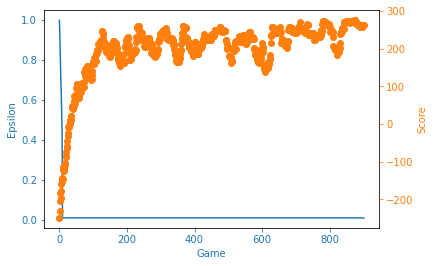

In [9]:
filename = 'lunarlander_part3.png'
x = [i+1 for i in range(len(eps_history))]
plotResult(x, scores, eps_history, filename)